In [5]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [11]:
# 다섯 마리의 물고기만 있는 호수에서 표본을 추출한다.
fish_5 = np.array([2, 3, 4, 5, 6])
fish_5

array([2, 3, 4, 5, 6])

In [13]:
# 무작위로 3마리를 추출한다
# 표본 추출
# replace에 True를 주면 추출한 값을 또다시 추출할 수 있다.
# False를 넣어주면 추출한 값은 다음 추출시 제외된다.
# 호수에서 물고기를 낚으면 그 물고기는 호수에 없다는 가정을 한다.
np.random.seed(1)
sample_1 = np.random.choice(fish_5, size=3, replace=False)
sample_1

array([4, 3, 6])

In [15]:
# 데이터를 불러온다.
fish_100000 = pd.read_csv('data/5-2-1-fish_length_100000.csv')
fish_100000

,length
0,5.297442
1,3.505566
2,3.572546
3,3.135979
4,4.689275
...,...
99995,4.158780
99996,4.818718
99997,4.060880
99998,4.271488


In [17]:
# 모집단의 크기
len(fish_100000)

100000

In [19]:
# 모집단에서 무작위로 추출한다. 500 마리를 추출한다.
np.random.seed(1)

sample_2 = np.random.choice(fish_100000['length'], size=500, replace=False)
sample_2

array([3.84378815, 2.5063875 , 4.95892771, 5.04877033, 4.56975969,
       2.76014829, 4.95107106, 4.19193018, 4.69562894, 3.79076231,
       4.3701771 , 5.97347196, 5.94221756, 5.62455   , 5.0390565 ,
       4.64449197, 3.26315444, 4.49165778, 4.28528308, 2.88912961,
       3.82321581, 4.86376449, 4.29088993, 4.79006916, 3.06351114,
       4.72719783, 3.92078275, 3.78734181, 2.93404643, 4.45342143,
       2.24620856, 3.58258505, 3.02041777, 5.10245051, 2.98514632,
       2.70616604, 5.2436441 , 4.26776626, 5.0050112 , 4.13229476,
       3.81713426, 3.77510347, 3.67114363, 3.53302928, 3.65876498,
       3.57175535, 4.46400141, 3.95934728, 4.271893  , 3.52538142,
       3.98492988, 3.99617533, 3.03940519, 2.88199047, 5.42350895,
       3.91875056, 3.92960781, 2.87720785, 3.65637692, 4.91618175,
       4.89515634, 4.85534149, 3.05613834, 4.56704705, 3.28866862,
       4.8705286 , 4.26254602, 4.11003509, 3.75582213, 4.53162194,
       4.54078267, 2.97965757, 3.70183249, 3.00511146, 4.98867

In [21]:
# 표본의 평균을 구한다.
np.mean(sample_2)

4.056083376532648

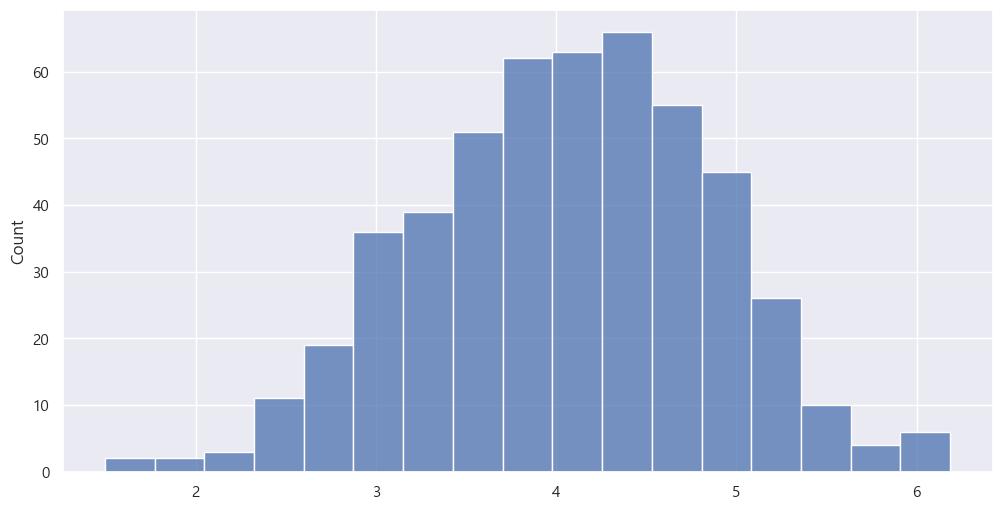

In [27]:
# 표본을 시각화한다.
sns.histplot(data=sample_2)
plt.show()
# 표본을 히스토그램으로 그려보면 좌우 대칭의 종 모양으로 되어 있는 것을 볼 수 있다.
# 무작위로 추출했는데 이러한 모습을 보인다면 모집단도 대칭의 종 형태가 아닐까 추측해
# 볼 수 있다.

In [30]:
# 모집단의 평균, 분산, 표준편차
print(f'평균 : {np.mean(fish_100000.length)}')
print(f'분산 : {np.var(fish_100000.length, ddof=0)}')
print(f'표준편차 : {np.std(fish_100000.length, ddof=0)}')

평균 : 4.000000000000001
분산 : 0.6400000000000087
표준편차 : 0.8000000000000054


In [32]:
# 모집단의 확률 밀도를 구해본다.
# 확률 변수
x = np.arange(0, 8.1, 0.1)
# 확률 밀도
density = stats.norm.pdf(x=x, loc=4, scale=0.8)

density_df = pd.DataFrame({
    'x' : x,
    'density' : density
})
density_df

,x,density
0,0.0,0.000002
1,0.1,0.000003
2,0.2,0.000006
3,0.3,0.000011
4,0.4,0.000020
...,...,...
76,7.6,0.000020
77,7.7,0.000011
78,7.8,0.000006
79,7.9,0.000003


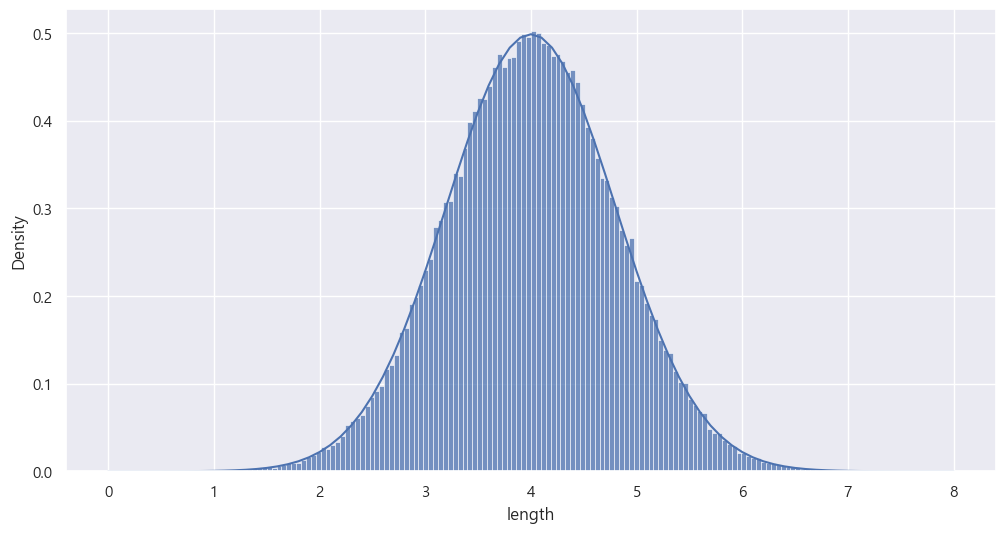

In [34]:
# 모집단 분포의 히스토그램
sns.histplot(fish_100000.length, stat='density')
# 확률 밀도값
sns.lineplot(data=density_df, x='x', y='density')
plt.show()

- 모집단이 정규분포를 이루고 있을 경우 무작위 샘플 추출을 많이 하면 모집단과 유사한
- 형태의 표본을 추출할 수 있다.
- 정규분포인 경우 대부분의 데이터가 평균에 가까이 있기 때문이다.